In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('./ETH.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')

df = df.sort_values(by='Date', ascending=True)
print(df)
df1=df.reset_index()['Price']

           Date    Price      Open      High       Low     Vol. Change %
2023 2017-12-01   460.67    432.21       467    413.96  594.10K    6.58%
2022 2017-12-02   455.51    460.67       472       447  473.67K   -1.12%
2021 2017-12-03   459.49    455.51    482.69    431.04  482.91K    0.87%
2020 2017-12-04   465.00    459.49    471.06    439.27  431.18K    1.20%
2019 2017-12-05   451.87       465    467.38    444.17  656.34K   -2.82%
...         ...      ...       ...       ...       ...      ...      ...
4    2023-06-12  1742.60  1,752.80  1,757.79  1,722.92  320.47K   -0.58%
3    2023-06-13  1739.60  1,742.60  1,763.15  1,727.64  303.23K   -0.17%
2    2023-06-14  1650.96  1,739.60  1,749.90  1,636.49  451.13K   -5.10%
1    2023-06-15  1666.96  1,650.96  1,678.94  1,632.50  397.40K    0.97%
0    2023-06-16  1675.16  1,666.96  1,675.73  1,660.24  343.61K    0.49%

[2024 rows x 7 columns]


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [5]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [6]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [10]:
# 8. Define LSTM Model

model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 25s 606ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 2/200
18/18 [==============================] - 8s 454ms/step - loss: 3.0956e-04 - val_loss: 0.0054
Epoch 3/200
18/18 [==============================] - 7s 386ms/step - loss: 2.1697e-04 - val_loss: 0.0049
Epoch 4/200
18/18 [==============================] - 8s 468ms/step - loss: 1.9896e-04 - val_loss: 0.0038
Epoch 5/200
18/18 [==============================] - 7s 387ms/step - loss: 1.9199e-04 - val_loss: 0.0084
Epoch 6/200
18/18 [==============================] - 8s 468ms/step - loss: 2.1127e-04 - val_loss: 0.0035
Epoch 7/200
18/18 [==============================] - 8s 463ms/step - loss: 1.9697e-04 - val_loss: 0.0035
Epoch 8/200
18/18 [==============================] - 8s 424ms/step - loss: 1.5315e-04 - val_loss: 0.0033
Epoch 9/200
18/18 [==============================] - 8s 471ms/step - loss: 1.6672e-04 - val_loss: 0.0036
Epoch 10/200
18/18 [==============================] - 7s 3

In [12]:
def evaluate_bi_lstm_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [13]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_bi_lstm_model(yval, X_val)

10/10 [==============================] - 3s 69ms/step


In [14]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_bi_lstm_model(ytest, X_test)

10/10 [==============================] - 1s 67ms/step


In [15]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 3s 71ms/step


In [16]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.244327   0.23970859 0.2398377  0.22934151 0.21433062 0.20208188
 0.21843681 0.23471766 0.24281998 0.269288   0.26542945 0.3176924
 0.30895722 0.30411868 0.31576842 0.30712636 0.31025046 0.32053287
 0.28673721 0.28931522 0.32853784 0.34758719 0.34647809 0.34122894
 0.33784874 0.32728693 0.32757902 0.32474278 0.32238489 0.3500636
 0.34002248 0.34214331 0.35868026 0.34267457 0.37456319 0.38023989
 0.39661176 0.40208739 0.39184307 0.38446673 0.37948215 0.37048239
 0.37309215 0.32292251 0.31575149 0.32477876 0.32657787 0.33465056
 0.33290437 0.34110194 0.30146024 0.29780911 0.28414014 0.31088332
 0.30469016 0.3114167  0.31784268 0.31569645 0.31193103 0.31644785
 0.324529   0.31199453 0.32716205 0.32829231 0.34606324 0.35782516
 0.35624829 0.34555737 0.31551231 0.3289421  0.29395903 0.28578262
 0.29314414 0.26482833 0.27350426 0.26235615 0.24635681 0.26301441
 0.26333613 0.26101635 0.25620321 0.26526224 0.26339328 0.26532785
 0.26505481 0.26349911 0.25991572 0.25228328 0.26237

In [17]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE      MAE      MAPE      RMSE
Validate  0.000703  0.01984  0.066339  0.026523
Test      0.007391  0.07977  0.124297  0.085970


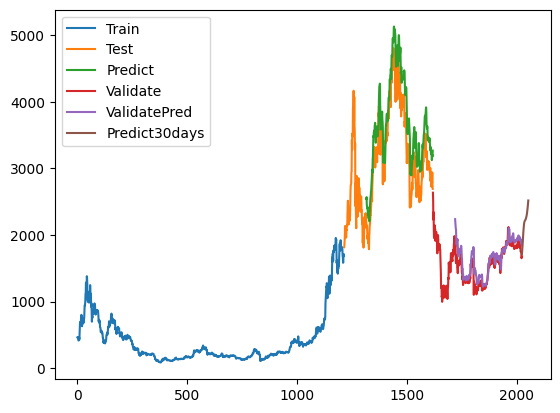

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [19]:
scaler.inverse_transform(lst_output)

array([[1713.26567268],
       [1752.13353971],
       [1799.3813067 ],
       [1851.78584856],
       [1907.05995878],
       [1963.02865099],
       [2017.17239346],
       [2067.00206796],
       [2110.46025875],
       [2145.99348458],
       [2173.08598348],
       [2192.03639894],
       [2204.46467131],
       [2212.61463972],
       [2218.32575663],
       [2223.38791177],
       [2229.14830978],
       [2236.43318358],
       [2245.95823564],
       [2257.67207278],
       [2271.06653643],
       [2286.40971578],
       [2304.47799946],
       [2325.90725453],
       [2351.03906945],
       [2379.92497817],
       [2412.141304  ],
       [2446.87307825],
       [2482.96740467],
       [2518.87389967]])